In [108]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.integrate import odeint

In [109]:
def solve_ode(deriv, uinit1,uinit2):
    time=np.linspace(0,20,1000)
    u=odeint(deriv,(uinit1,uinit2),time)
    x=u[:,0]
    y=u[:,1]
    axes=plt.gca()
    axes.set_xlim([-5,5])
    axes.set_ylim([-5,5])
    return plt.plot(x,y)
 

# Phase portraits

1. Give an example of two matrices $A, B$ such that $\exp(A + B) \neq \exp(A)\exp(B)$.

The following works:
$$
A = \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}, \quad B = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

2. (a) Draw with Python the phase portrait of equations $\dot{x}(t) = A x(t)$ with $A = \begin{pmatrix} 1 & 2\\3&4\end{pmatrix}, A = \begin{pmatrix}1 & -1\\2 & 1 \end{pmatrix}$ and $A = \begin{pmatrix} -1 & -2 \\ 2 &-1\end{pmatrix}$.

<IPython.core.display.Javascript object>


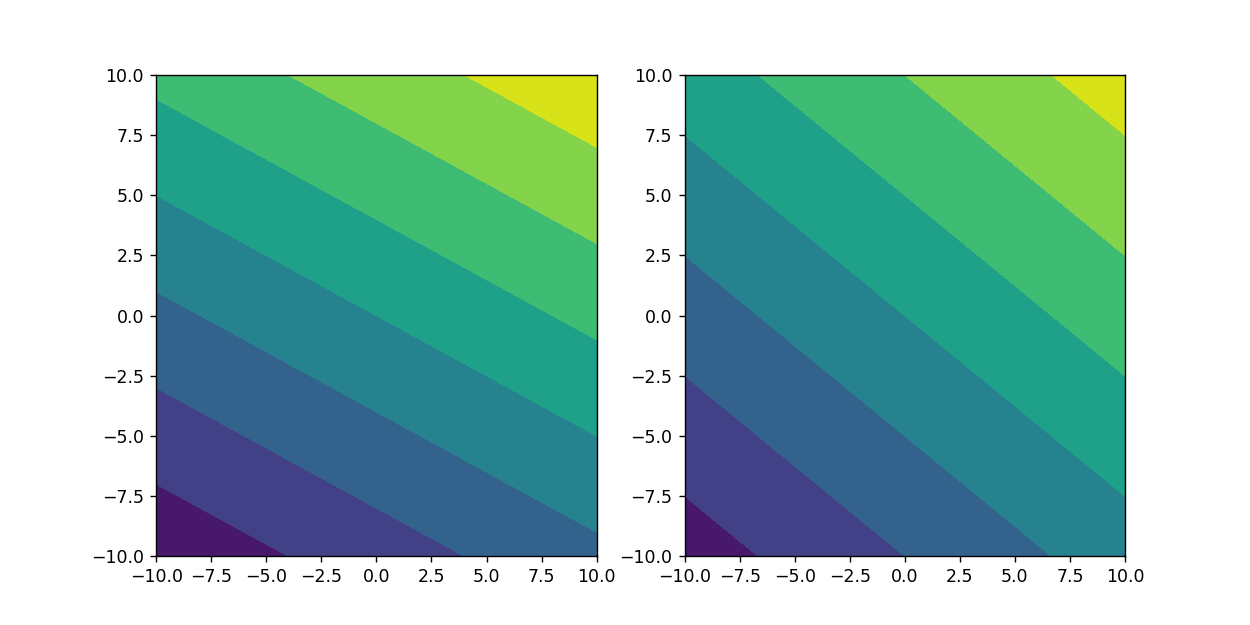

<IPython.core.display.Javascript object>


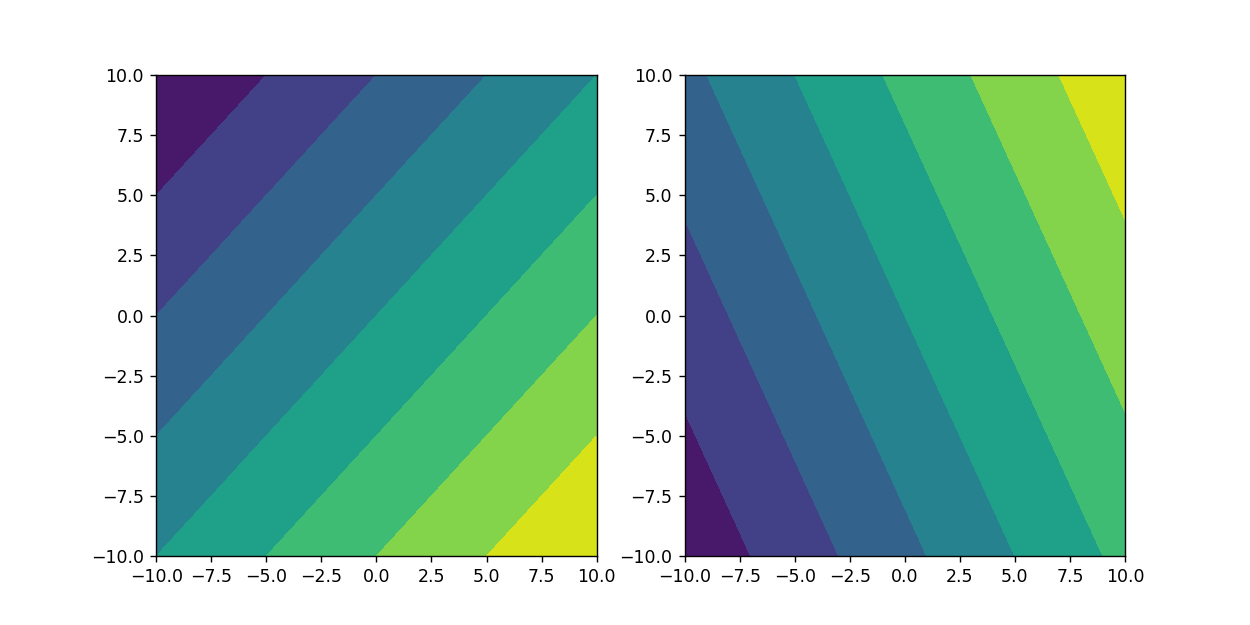

<IPython.core.display.Javascript object>


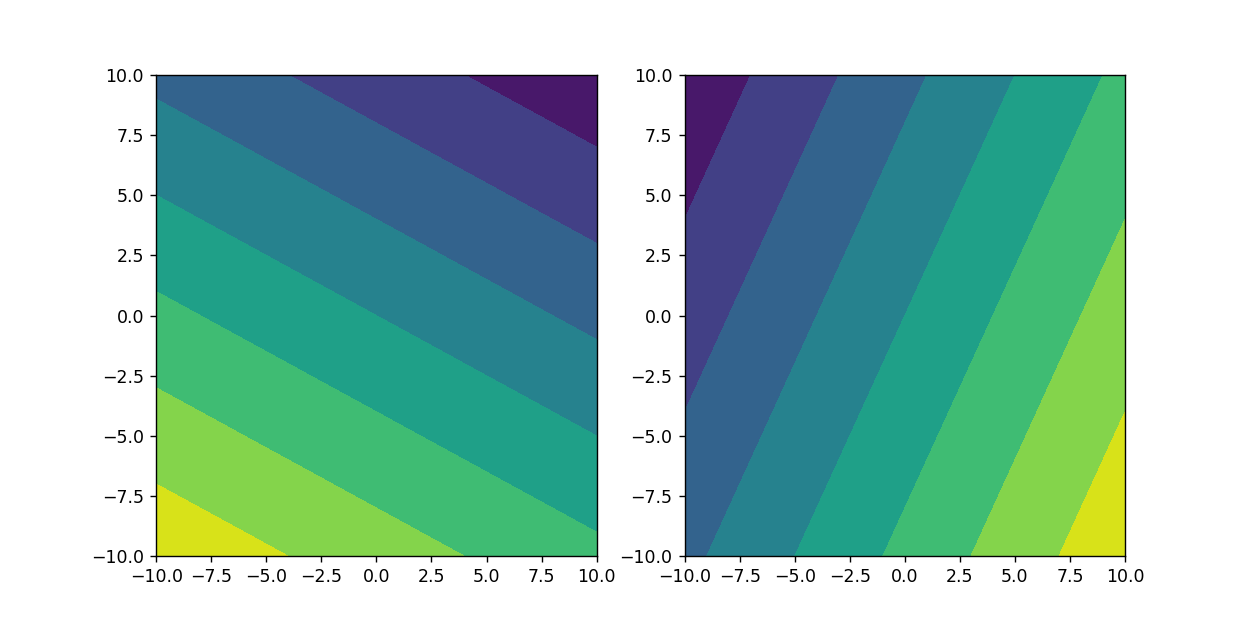

In [110]:
Xmin = -10
Xmax = 10
nb = 100

x = np.linspace(Xmin, Xmax, nb)
y = np.linspace(Xmin, Xmax, nb)

xx,yy = np.meshgrid(x, x)

A = np.array([[1,2],[3,4]])

z1 = A[0,0]*xx + A[0, 1]*yy
z2 = A[1, 0]*xx + A[1, 1]*yy

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].contourf(x, y, z1)
axs[1].contourf(x, y, z2)
plt.show()

A = np.array([[1,-1],[2,1]])

z1 = A[0,0]*xx + A[0, 1]*yy
z2 = A[1, 0]*xx + A[1, 1]*yy

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].contourf(x, y, z1)
axs[1].contourf(x, y, z2)
plt.show()

A = np.array([[-1,-2],[2,-1]])

z1 = A[0,0]*xx + A[0, 1]*yy
z2 = A[1, 0]*xx + A[1, 1]*yy

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].contourf(x, y, z1)
axs[1].contourf(x, y, z2)
plt.show()

2. (b) Draw the phase portrait of $\ddot{x}(t) + \sin(x(t)) = 0$ and $\ddot{x}(t) + f\dot{x}(t) + \sin(x(t)) = 0$ for various values of $f$.

Taking $y_1 = \dot{x}$ and $y_2 = x$ we get the following system of equations:
$$
\begin{cases}
\dot{y_1} = - \sin(y_2)\\
\dot{y_2} = y_1
\end{cases} \text{ or in the second case } \begin{cases}
\dot{y_1} = - \sin(y_2) + f y_1\\
\dot{y_2} = y_1
\end{cases}
$$

In [111]:
def phase_portrait(deriv, lims = (np.linspace(-2, 2, 50), np.linspace(-8, 8, 50))):
    y1, y2 = lims
    Y1, Y2 = np.meshgrid(y1, y2)
    t = 0
    u, v, n = np.zeros(Y1.shape), np.zeros(Y1.shape), np.zeros(Y1.shape)
    NI, NJ = Y1.shape
    for i in range(NI):
        for j in range(NJ):
            x,y = Y1[i,j], Y2[i,j]
            prime = deriv([x,y], t)
            u[i,j] = prime[0]
            v[i,j] = prime[1]
            n[i,j] = prime[0]**2 + prime[1]**2
    fig = plt.figure()
    plt.quiver(Y1, Y2, u, v, color = 'r')
    plt.contour(Y1, Y2, n)
    
    plt.xlabel('$y_2$')
    plt.ylabel('$y_1$')
    
    plt.show()

<IPython.core.display.Javascript object>


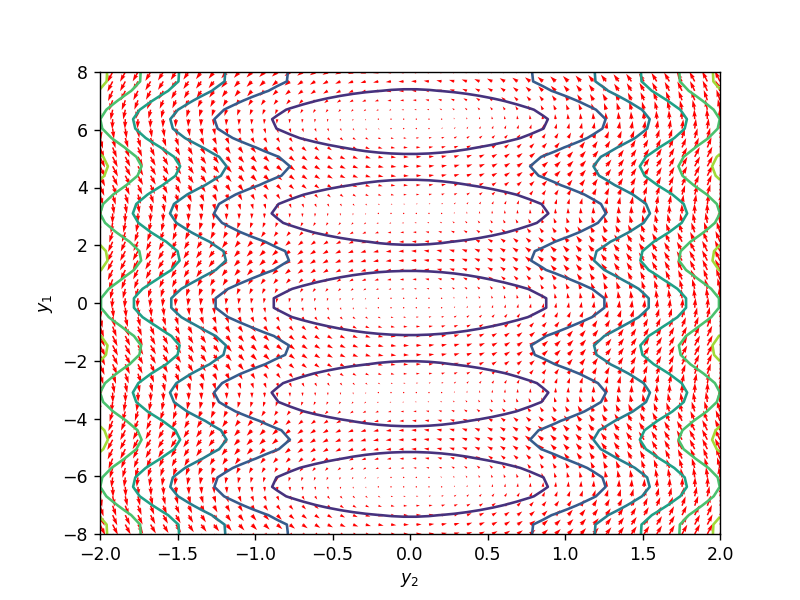

<IPython.core.display.Javascript object>


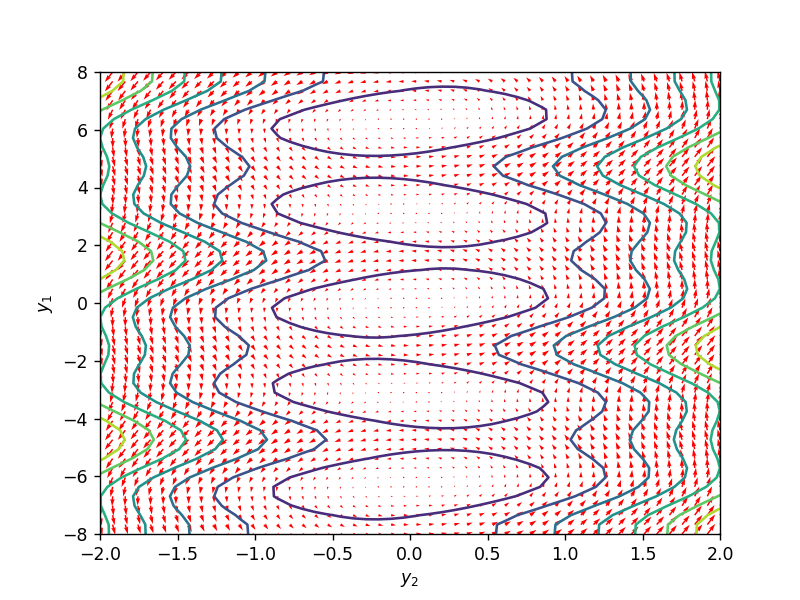

In [112]:
def deriv1(Y, t):
    y1, y2 = Y
    return [-np.sin(y2), y1]

def deriv2(Y, t):
    y1, y2 = Y
    return [-np.sin(y2) + f*y1, y1]

phase_portrait(deriv1)

f = 0.265
phase_portrait(deriv2)

2. (c) Draw the phase portrait of your favorite non-linear equation.

# Asymptotic expansion for solutions.

Consider the equation:
$$
\ddot{x}(t) + x(t) + x(t)^3 = 0
$$

1. Find the equilibria. Are they stable? unstable?

We first look for the fixed points. By differentiating the equation we have:
$$
\dddot{x}(t) + \dot{x}(t) + 3 x(t)^2 \dot{x}(t) = 0
$$
So at the fixed point we get:
$$
\dddot{x}(t) = 0
$$
Which forces that $\ddot{x}(t) = c$ at the fixed point and $\dot{x}(t) = 0$ forces $c = 0$. Hence we obtain:
$$
x(t) + x(t)^3 = 0 \Leftrightarrow x(t) = 0 \lor x(t) = \pm i
$$
Then consider a small displacement $\epsilon$ from the fixed point. For $x = 0$ we have:
$$
\ddot{\epsilon} + \epsilon + \epsilon^3 = 0 \Leftrightarrow \ddot{\epsilon} + \epsilon = 0 \Leftrightarrow \epsilon = c e^{i t}
$$
So the $x = 0$ is neither stable nor unstable it is an orbit point. Now adding the $x^3$ correction ($\epsilon = ce^{it} + \mu$) we obtain:
$$
-ce^{it} + \ddot{\mu} + c e^{it} + \mu + (ce^{it} + \mu)^3 = 0 \Leftrightarrow \ddot{\mu} + \mu + c^3e^{3 it} + \mu c^2 e^{2it} = 0 \Leftrightarrow \ddot{\mu} + \alpha(t)^2 \mu + \kappa(t) = 0
$$
We notice once again an orbital movement hence we cannot conclude on the stability of the fixed point $x = 0$. Now if we look at $x = i$ we get:
$$
\ddot{\epsilon} + \epsilon + i + (\epsilon + i)^3 = 0 \Leftrightarrow \ddot{\epsilon} + \epsilon + i - i - \epsilon = 0 \Leftrightarrow \ddot{\epsilon} = 0 \Leftrightarrow \epsilon(t) = \dot{\epsilon}_0 t + \epsilon_0 
$$
So this point is not stable. Now if we take $x = -i$ we get:
$$
\ddot{\epsilon} + \epsilon - i + (\epsilon - i)^3 = 0 \Leftrightarrow \ddot{\epsilon} + \epsilon - i + (-i)^3 + (-i)^2 \epsilon = 0 \Leftrightarrow \ddot{\epsilon} = 0
$$
So identically this point is not stable either.

2. Compute with Python the first terms of the expansion in $\epsilon$ of the solutions with $x(0) = \epsilon, \dot{x}(0) = 0$.

Since $\epsilon \ll 1$ we can assume that $\ddot{x}(0) \approx x(0) = \epsilon$. Now taking $y_1 = \dot{x}$ and $y_2 = x$ we get:
$$
\begin{cases}
\dot{y_1} = - y_2 - y_2^3\\
\dot{y_2} = y_1
\end{cases}
\quad \text{ and } \quad y_1(0) = 0, \quad y_2(0) = \epsilon
$$

In [113]:
def Euler_Method(deriv, u0, dt, nb_steps):
    u = np.zeros([len(u0),nb_steps + 1])
    ttab = np.array([0]*(nb_steps+1))
    u[:, 0] = u0
    t = 0
    ttab[0] = 0
    for i in range(0, nb_steps):
        u[:, i+1] = u[:,i] + dt*deriv(u[:, i], t)
        t += dt
        ttab[i+1] = t
    return ttab, u


<IPython.core.display.Javascript object>


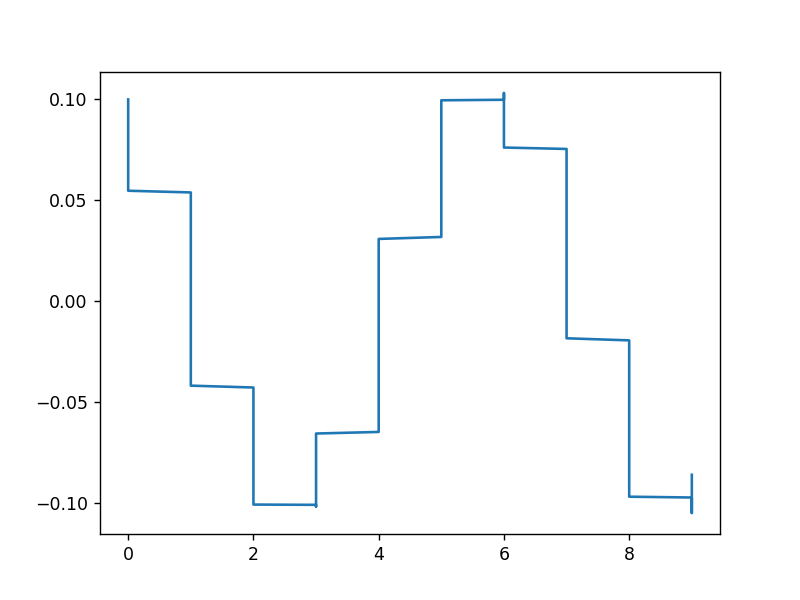

In [114]:
epsilon = 0.1
u0 = np.array([0,epsilon])
dt = 0.01
nb_steps = 1000

def deriv(u, t):
    y1, y2 = u
    return np.array([-y2 - y2**3, y1])

ttab, u = Euler_Method(deriv, u0, dt, nb_steps)

fig = plt.figure()
plt.plot(ttab, u[1, :])
plt.show()

In [98]:
u0[:, 0] = [1, 2]
u0

array([[1., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.]])

# Criterion for instability